In [3]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/foxdocs/cph-bi-2024/main/Data/house-data.csv')
print(data.head())  # Quick inspection of the data


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [4]:
data = data.dropna()  # Drop rows with missing values
print(data.head())  # Quick inspection of the data


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [5]:
data = data.drop(columns=['id', 'date'])  # Drop columns that are not needed
print(data.head())  # Quick inspection of the data


      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15 

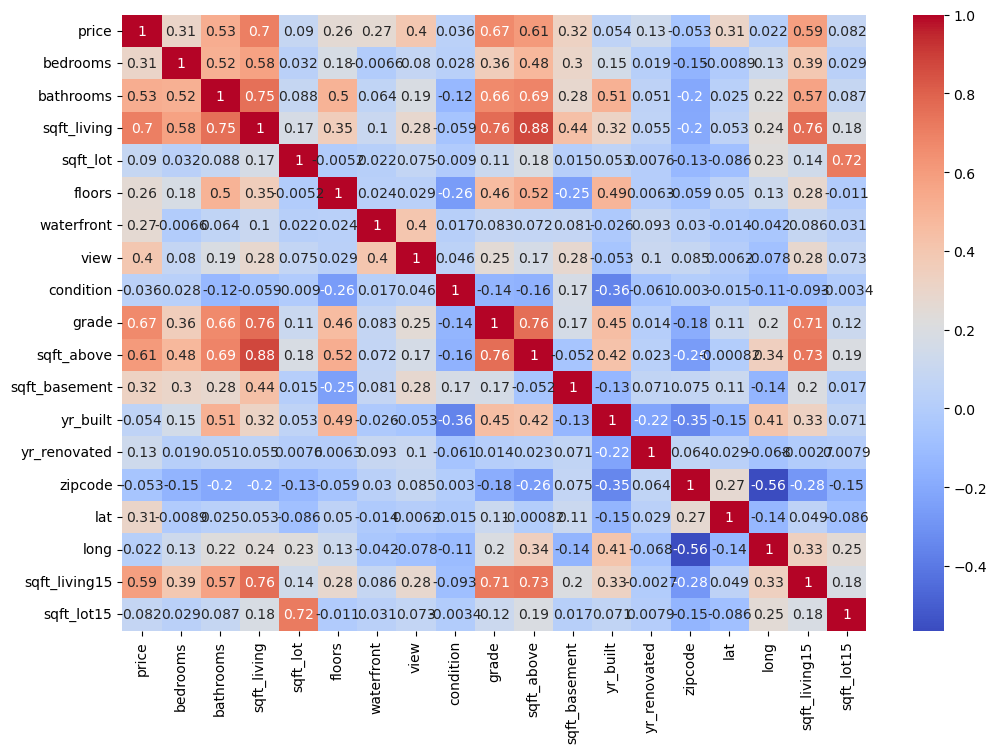

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [17]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['sqft_living']]  # Example: Single feature
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))


MSE: 76484977061.77612
R²: 0.49406905389089006


In [20]:
#Multiple Linear Regression
X = data.drop(['price'], axis=1)  # Use all features except price
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multiple_linear_regressor = LinearRegression()
multiple_linear_regressor.fit(X_train, y_train)

y_pred = multiple_linear_regressor.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))



MSE: 45173046132.78945
R²: 0.7011904448878459


In [22]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=2)  # Example with degree 2
poly_reg_model = make_pipeline(poly, LinearRegression())

poly_reg_model.fit(X_train, y_train)
y_pred = poly_reg_model.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))


MSE: 30511092223.3481
R²: 0.7981759771868284


In [24]:
import joblib

# Save the model
joblib.dump(linear_regressor, 'best_model.pkl')

['best_model.pkl']